# Durstewitz Reproduction

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='poster', style='whitegrid')

import neuron

import time

neuron.h.load_file('./NEURON/durstewitz/durstewitz.hoc')
neuron.h.load_file('stdrun.hoc')

	1 


1.0

## Run one cell at a time

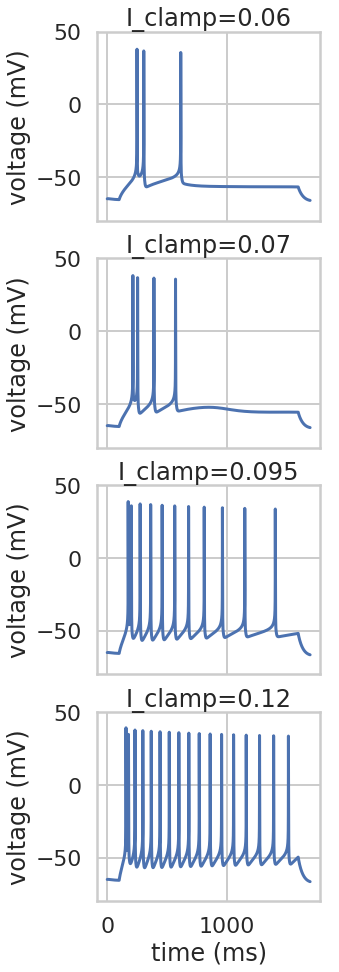

In [2]:
cell = neuron.h.Durstewitz()

times = []
volts = []
spikes = []
somatic_currents = np.array([0.060, 0.070, 0.095, 0.120])
for amp in somatic_currents:
    cell.init()

    v_rec = neuron.h.Vector()
    t_rec = neuron.h.Vector()
    spk_vec = neuron.h.Vector()
    v_rec.record(cell.soma(0.5)._ref_v)
    t_rec.record(neuron.h._ref_t)
    spk_rec = neuron.h.APCount(cell.soma(0.5))
    spk_rec.record(neuron.h.ref(spk_vec))

    stim = neuron.h.IClamp(cell.soma(0))
    stim.delay = 100  # ms
    stim.dur = 1500  # ms
    stim.amp = amp  # namp
    
    neuron.h.tstop = 1700
    neuron.h.run()
    
    times.append(np.array(t_rec))
    volts.append(np.array(v_rec))
    spikes.append(np.array(spk_vec))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

## Run all cells together

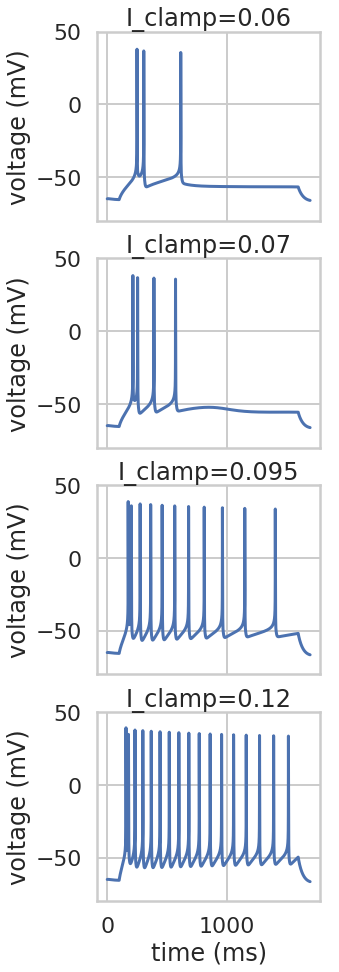

In [3]:
v_recs = []
t_recs = []
spk_recs = []
spk_vecs = []
cells = []
stims = []
somatic_currents = np.array([0.060, 0.070, 0.095, 0.120])

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init()

    v_recs.append(neuron.h.Vector())
    t_recs.append(neuron.h.Vector())
    spk_vecs.append(neuron.h.Vector())
    v_recs[-1].record(cells[-1].soma(0.5)._ref_v)
    t_recs[-1].record(neuron.h._ref_t)
    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))

    stims.append(neuron.h.IClamp(cells[-1].soma(0)))
    stims[-1].delay = 100  # ms
    stims[-1].dur = 1500  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = 1700
neuron.h.run()

times = []
volts = []
spikes = []
for n in range(len(somatic_currents)):
    times.append(np.array(t_recs[n]))
    volts.append(np.array(v_recs[n]))
    spikes.append(np.array(spk_vecs[n]))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

## Run with Dopamine perturbation

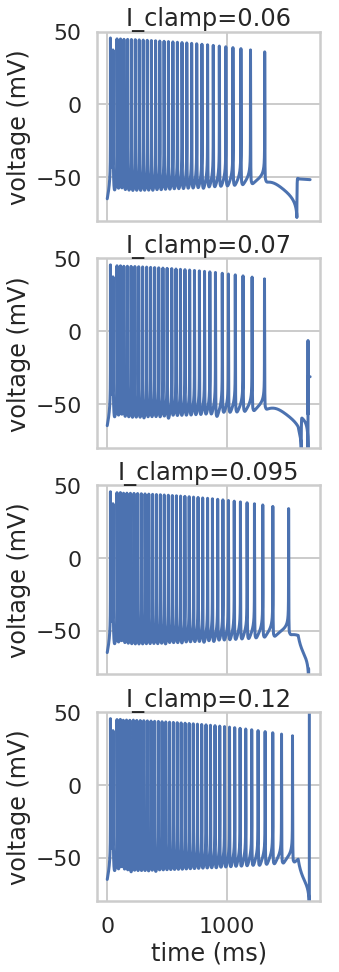

In [5]:
v_recs = []
t_recs = []
spk_recs = []
spk_vecs = []
cells = []
stims = []
somatic_currents = np.array([0.060, 0.070, 0.095, 0.120])

for amp in somatic_currents:
    cells.append(neuron.h.Durstewitz())
    cells[-1].init_DA()

    v_recs.append(neuron.h.Vector())
    t_recs.append(neuron.h.Vector())
    spk_vecs.append(neuron.h.Vector())
    v_recs[-1].record(cells[-1].soma(0.5)._ref_v)
    t_recs[-1].record(neuron.h._ref_t)
    
    spk_recs.append(neuron.h.APCount(cells[-1].soma(0.5)))
    spk_recs[-1].record(neuron.h.ref(spk_vecs[-1]))

    stims.append(neuron.h.IClamp(cells[-1].soma(0)))
    stims[-1].delay = 100  # ms
    stims[-1].dur = 1500  # ms
    stims[-1].amp = amp  # namp
    
neuron.h.tstop = 1700
neuron.h.run()

times = []
volts = []
spikes = []
for n in range(len(somatic_currents)):
    times.append(np.array(t_recs[n]))
    volts.append(np.array(v_recs[n]))
    spikes.append(np.array(spk_vecs[n]))
    
fig, axes = plt.subplots(4, 1, figsize=(4, 16), sharex=True, sharey=True)
for i in range(len(somatic_currents)):
    axes[i].plot(times[i], volts[i])
    axes[i].set(ylabel='voltage (mV)', ylim=((-80, 50)), title='I_clamp=%s' %somatic_currents[i])
axes[-1].set(xlabel='time (ms)')
plt.show()

# Runtime Tests

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='poster', style='whitegrid')

import neuron

import time

neuron.h.load_file('./NEURON/durstewitz/durstewitz.hoc')
neuron.h.load_file('stdrun.hoc')

	1 


1.0

In [2]:
t_final = 0.1 * 1000  # ms

## neuron.h.run() continuously to t_final

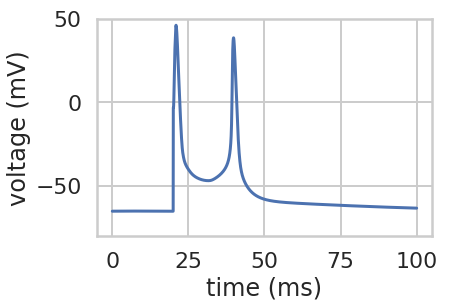

continuous: 0.06531310081481934


In [3]:
cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))
stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)
nc.pre().start = 20
nc.pre().number = 1
nc.pre().interval = 0
nc.pre().noise = 0

s1 = time.time()
neuron.h.tstop = t_final
neuron.h.run()
e1 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('continuous: %s' %(e1-s1))

## neuron.h.run() broken up by dt

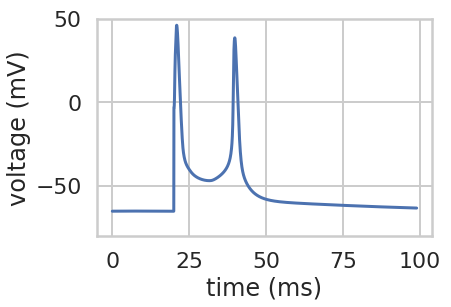

broken by dt with run(): 1.5031657218933105


In [4]:
cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))
stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)
nc.pre().start = 20
nc.pre().number = 1
nc.pre().interval = 0
nc.pre().noise = 0

s2 = time.time()
for t in np.arange(0, t_final, 1):
    neuron.h.tstop = t
    neuron.h.run()
e2 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('broken by dt with run(): %s' %(e2-s2))

## neuron.h.continuerun() broken up by dt

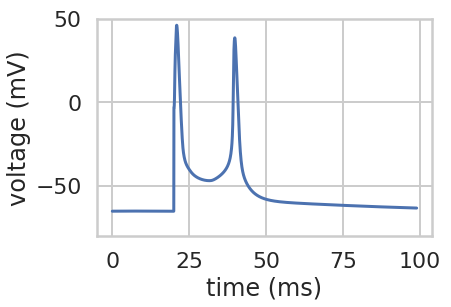

broken by dt with continuerun(): 0.06316161155700684


In [8]:
cell = neuron.h.Durstewitz()
cell.init()
v_rec = neuron.h.Vector()
t_rec = neuron.h.Vector()
spk_vec = neuron.h.Vector()
v_rec.record(cell.soma(0.5)._ref_v)
t_rec.record(neuron.h._ref_t)
spk_rec = neuron.h.APCount(cell.soma(0.5))
spk_rec.record(neuron.h.ref(spk_vec))

# neuron.h.init()

stim = neuron.h.NetStim()
syn = neuron.h.ExpSyn(cell.soma(0.5))
syn.tau = 0.1
nc = neuron.h.NetCon(stim, syn, 0, 0, 1e1)
nc.event(200)
nc.pre().start = 20
nc.pre().number = 1
nc.pre().interval = 0
nc.pre().noise = 0

s3 = time.time()
neuron.h.init()
for t in np.arange(0, t_final, 1):
    neuron.h.tstop = t
#     neuron.h.init()
    neuron.h.continuerun(neuron.h.tstop)
e3 = time.time()

times = np.array(t_rec)
volts = np.array(v_rec)
spikes = np.array(spk_vec)

fig, axes = plt.subplots(1, 1)
axes.plot(times, volts)
axes.set(ylabel='voltage (mV)', ylim=((-80, 50)))
axes.set(xlabel='time (ms)')
plt.show()

print('broken by dt with continuerun(): %s' %(e3-s3))

## Runtime results

In [6]:
print('continuous: %s' %(e1-s1))
print('broken by dt with run(): %s' %(e2-s2))
print('broken by dt with continuerun(): %s' %(e3-s3))

continuous: 0.06531310081481934
broken by dt with run(): 1.5031657218933105
broken by dt with continuerun(): 0.06531929969787598
